In [1]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)
def train_perceptron(X, y, eta=0.1, epochs=10000):
    X = np.insert(X, 0, -1, axis=1)
    w = np.random.rand(X.shape[1])
    for epoch in range(epochs):
        for i in range(len(X)):
            net = np.dot(w, X[i])
            output = sigmoid(net)
            error = y[i] - output
            delta = eta * error * sigmoid_derivative(output)
            w = w + delta * X[i]
    return w

def test_perceptron(X, w):
    X = np.insert(X, 0, -1, axis=1)
    outputs = []
    for i in range(len(X)):
        net = np.dot(w, X[i])
        output = sigmoid(net)
        outputs.append(output)
    return outputs
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

targets = {
    "AND": np.array([0, 0, 0, 1]),
    "OR":  np.array([0, 1, 1, 1]),
    "XOR": np.array([0, 1, 1, 0])
}

for gate, y in targets.items():
    print(f"\n{gate} Gate:")
    w = train_perceptron(X, y, eta=0.5, epochs=10000)
    outputs = test_perceptron(X, w)
    print("Final Weights:", w)
    for i, out in enumerate(outputs):
        print(f"Input: {X[i]} → Output: {out:.4f} (Target: {y[i]})")



AND Gate:
Final Weights: [11.01375783  7.28473806  7.28440277]
Input: [0 0] → Output: 0.0000 (Target: 0)
Input: [0 1] → Output: 0.0234 (Target: 0)
Input: [1 0] → Output: 0.0235 (Target: 0)
Input: [1 1] → Output: 0.9722 (Target: 1)

OR Gate:
Final Weights: [3.7363941  7.94496637 7.94517808]
Input: [0 0] → Output: 0.0233 (Target: 0)
Input: [0 1] → Output: 0.9854 (Target: 1)
Input: [1 0] → Output: 0.9854 (Target: 1)
Input: [1 1] → Output: 1.0000 (Target: 1)

XOR Gate:
Final Weights: [-0.06444631 -0.12889262 -0.06444631]
Input: [0 0] → Output: 0.5161 (Target: 0)
Input: [0 1] → Output: 0.5000 (Target: 1)
Input: [1 0] → Output: 0.4839 (Target: 1)
Input: [1 1] → Output: 0.4678 (Target: 0)



AND Operation:
Input1 Input2 Output
  0      0      0
  0      1      0
  1      0      0
  1      1      1
Weights: [ 4.64365224  4.64365227 -7.062872  ]


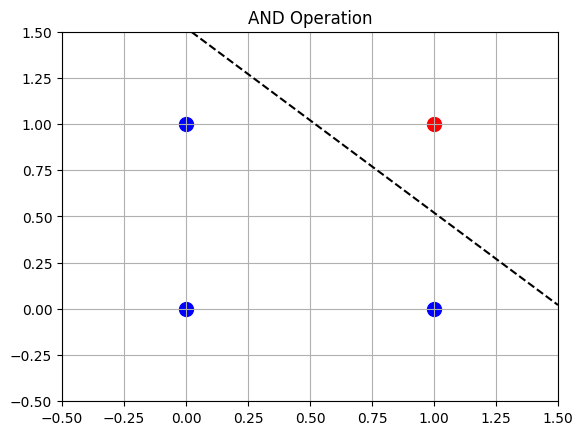


OR Operation:
Input1 Input2 Output
  0      0      0
  0      1      1
  1      0      1
  1      1      1
Weights: [ 5.3674545   5.36746859 -2.42861028]


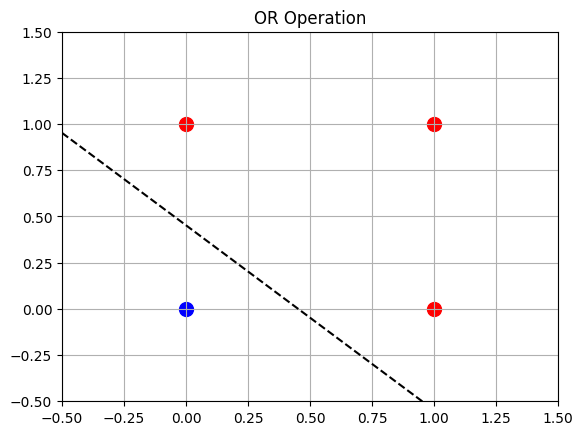


XOR Operation:
Input1 Input2 Output
  0      0      0
  0      1      0
  1      0      0
  1      1      1
Weights: [ 3.14239323e-11  3.14244451e-11 -3.72735352e-11]


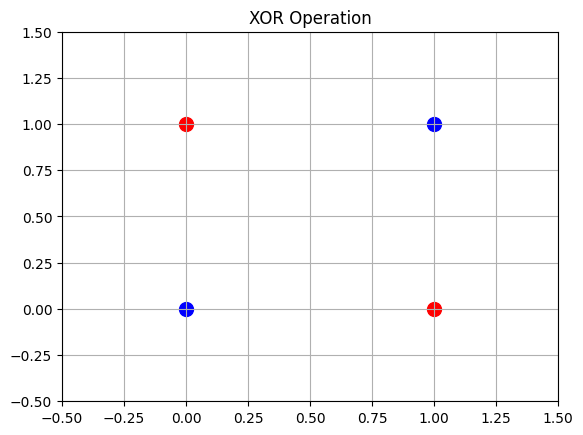

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simplified activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def predict(X, weights):
    return np.where(sigmoid(np.dot(X, weights)) > 0.5, 1, 0)

# Training function
def train(X, y, learning_rate=0.05, epochs=10000):
    weights = np.random.rand(X.shape[1]) * 0.1
    errors = []
    
    for epoch in range(epochs):
        # Forward pass
        output = sigmoid(np.dot(X, weights))
        error = y - output
        
        # Update weights
        weights += learning_rate * np.dot(X.T, error * output * (1 - output))
        
        # Track error
        if epoch % 1000 == 0:
            errors.append(np.mean(error**2))
    
    return weights, errors

# Data (with bias term)
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])

# Target outputs
targets = {
    'AND': np.array([0, 0, 0, 1]),
    'OR':  np.array([0, 1, 1, 1]),
    'XOR': np.array([0, 1, 1, 0])
}

# Train and test each operation
for name, y in targets.items():
    print(f"\n{name} Operation:")
    w, errors = train(X, y)
    pred = predict(X, w)
    
    print("Input1 Input2 Output")
    for i in range(4):
        print(f"  {X[i,0]}      {X[i,1]}      {pred[i]}")
    
    print(f"Weights: {w}")
    
    # Plot decision boundary
    plt.figure()
    for i in range(4):
        plt.scatter(X[i,0], X[i,1], c='r' if y[i] else 'b', marker='o', s=100)
    
    # Create boundary line
    x_vals = np.array([-0.5, 1.5])
    if name != 'XOR':  # Only plot line for linearly separable cases
        y_vals = (-w[2] - w[0]*x_vals) / w[1]
        plt.plot(x_vals, y_vals, 'k--')
    
    plt.title(f"{name} Operation")
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.grid()
    plt.show()